In [ ]:
!pip install yfinance
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


#CNN

## CNN 10 years

[*********************100%***********************]  1 of 1 completed


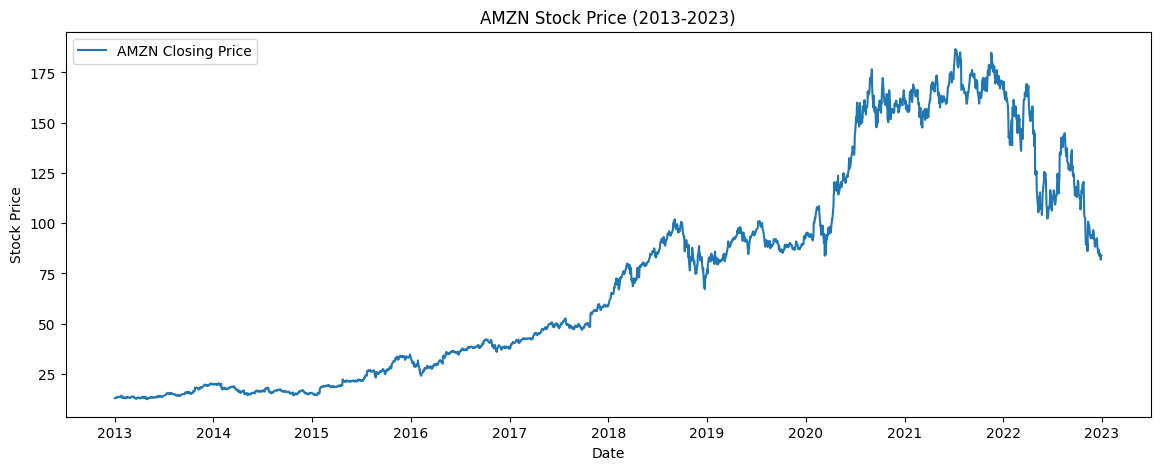

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for AMZN
df = yf.download('AMZN', start='2013-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='AMZN Closing Price')
plt.title('AMZN Stock Price (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

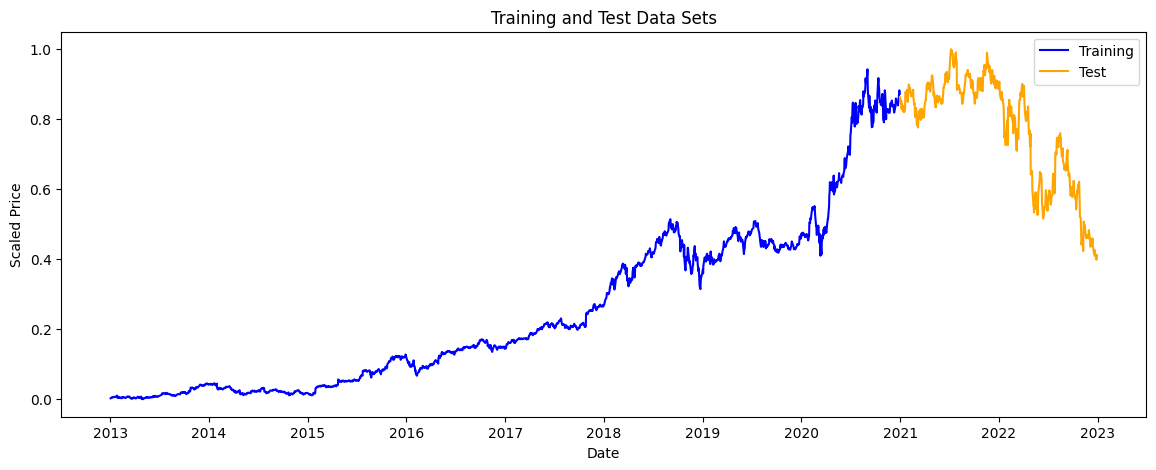

In [ ]:
# 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [ ]:
# min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 0.9425926805413609
Test Data - Min: 0.39853525491054886 Max: 1.0


In [ ]:
# Training Data
train_start_date = df.index[0]  # Starting date of the training set
train_end_date = df.index[q_80 - 1]  # Ending date of the training set

# Test Data
test_start_date = df.index[q_80]  # Starting date of the test set
test_end_date = df.index[-1]  # Ending date of the test set

# Print the start and end dates for each dataset
print("Training Data - Start Date:", train_start_date, ", End Date:", train_end_date)
print("Test Data - Start Date:", test_start_date, ", End Date:", test_end_date)

Training Data - Start Date: 2013-01-02 00:00:00 , End Date: 2020-12-30 00:00:00
Test Data - Start Date: 2020-12-31 00:00:00 , End Date: 2022-12-30 00:00:00


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (2007, 7, 1)
X_test shape: (497, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0413 - mean_absolute_error: 0.1277 - mse: 0.0413
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9574e-04 - mean_absolute_error: 0.0110 - mse: 2.9574e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9606e-04 - mean_absolute_error: 0.0088 - mse: 1.9606e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8733e-04 - mean_absolute_error: 0.0085 - mse: 1.8733e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2263e-04 - mean_absolute_error: 0.0089 - mse: 2.2263e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1596e-04 - mean_absolute_error: 0.0086 - mse: 2.1596e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1668e-04 - mean_absolute_error: 0.0087 - mse: 2.1668e-04
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9870e-04 - mean_absolute_error: 0.0083 - mse: 1.9870e-04
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1884e-04 - mean_absolut

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

## CNN 5

[*********************100%***********************]  1 of 1 completed


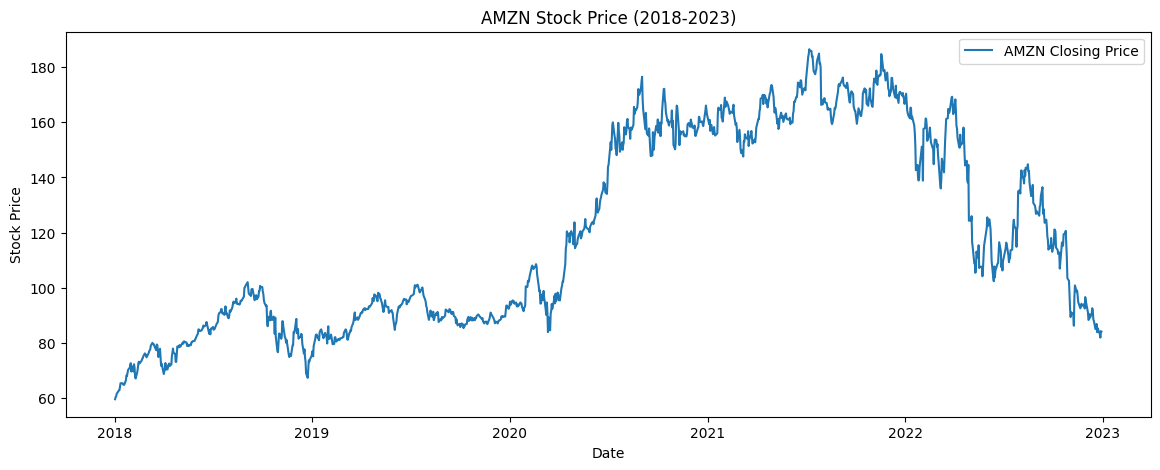

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for AMZN
df = yf.download('AMZN', start='2018-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='AMZN Closing Price')
plt.title('AMZN Stock Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

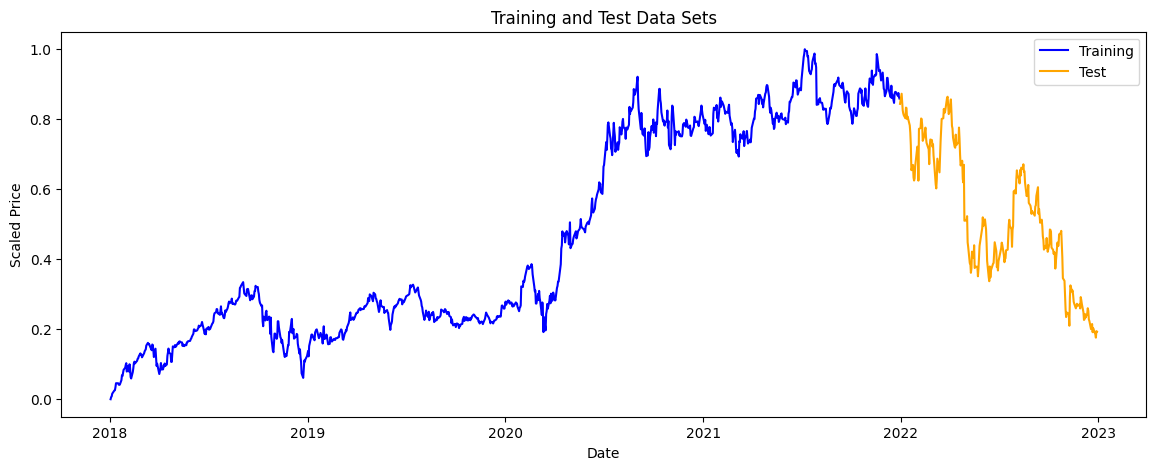

In [ ]:
# Define split points for the 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


In [ ]:
# Calculate and print the min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 1.0
Test Data - Min: 0.17597152348787698 Max: 0.8728288153936123


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1000, 7, 1)
X_test shape: (245, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2234 - mean_absolute_error: 0.3752 - mse: 0.2234
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 - mean_absolute_error: 0.0957 - mse: 0.0115 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - mean_absolute_error: 0.0726 - mse: 0.0066 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - mean_absolute_error: 0.0502 - mse: 0.0033
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - mean_absolute_error: 0.0315 - mse: 0.0016
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6698e-04 - mean_absolute_error: 0.0228 - mse: 9.6698e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - mean_absolute_error: 0.0232 - mse: 0.0010
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - mean_absolute_error: 0.0231 - mse: 0.0010        
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - mean_absolute_error: 0.0232 - mse: 0.0010
Epoch 10/50


Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

## CNN feature Engineering

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical data for AMZN
df = yf.download('AMZN', start='2018-01-01', end='2023-01-01')

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop missing values
df.dropna(inplace=True)

# Print the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Close_Lagged_1,Close_Lagged_2,Close_Lagged_3,Close_Lagged_4,Close_Lagged_5
Date,,,,,,,,,,,,,,
2018-10-16,89.175003,91.194000,88.077499,90.998001,90.998001,117198000,96.00989,82.40693,42.565254,88.047501,89.430496,85.968002,87.762497,93.515999
2018-10-17,92.139503,92.250000,90.349998,91.586502,91.586502,105904000,95.97914,82.56761,44.084619,90.998001,88.047501,89.430496,85.968002,87.762497
2018-10-18,91.074501,91.507500,88.393501,88.536003,88.536003,117480000,95.86334,82.70924,38.412237,91.586502,90.998001,88.047501,89.430496,85.968002
2018-10-19,89.258003,90.455002,87.650002,88.201500,88.201500,118144000,95.72885,82.84785,37.837310,88.536003,91.586502,90.998001,88.047501,89.430496
2018-10-22,89.199997,90.474998,87.800003,89.464996,89.464996,90000000,95.63185,82.98789,41.404806,88.201500,88.536003,91.586502,90.998001,88.047501


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define split points
q_80 = int(len(scaled_data) * 0.8)
q_90 = int(len(scaled_data) * 0.9)

# Split data into training, validation, and test sets
train_data = scaled_data[:q_80]
val_data = scaled_data[q_80:q_90]
test_data = scaled_data[q_90:]

# Create sequences (with 0 lag)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # 10-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import time
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build CNN model with improved architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features)-1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Start the stopwatch
start_time = time.time()

# Train the model with updated settings with early stopping callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Stop the stopwatch
end_time = time.time()

# Calculate and display the training time
training_time_seconds = end_time - start_time
print('Training Time: {:.2f} seconds'.format(training_time_seconds))

# Display model summary
model.summary()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2729 - mean_absolute_error: 0.3633 - val_loss: 0.0121 - val_mean_absolute_error: 0.0900
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mean_absolute_error: 0.0902 - val_loss: 0.0112 - val_mean_absolute_error: 0.0838
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - mean_absolute_error: 0.0770 - val_loss: 0.0129 - val_mean_absolute_error: 0.0901
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 - mean_absolute_error: 0.0847 - val_loss: 0.0117 - val_mean_absolute_error: 0.0857
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - mean_absolute_error: 0.0717 - val_loss: 0.0119 - val_mean_absolute_error: 0.0864
Training Time: 2.05 seconds


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 8, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 8.922190076777817
MAE: 6.9407820230628845
MSE: 79.60547576615255
Accuracy Percentage (R-squared): 74.14%


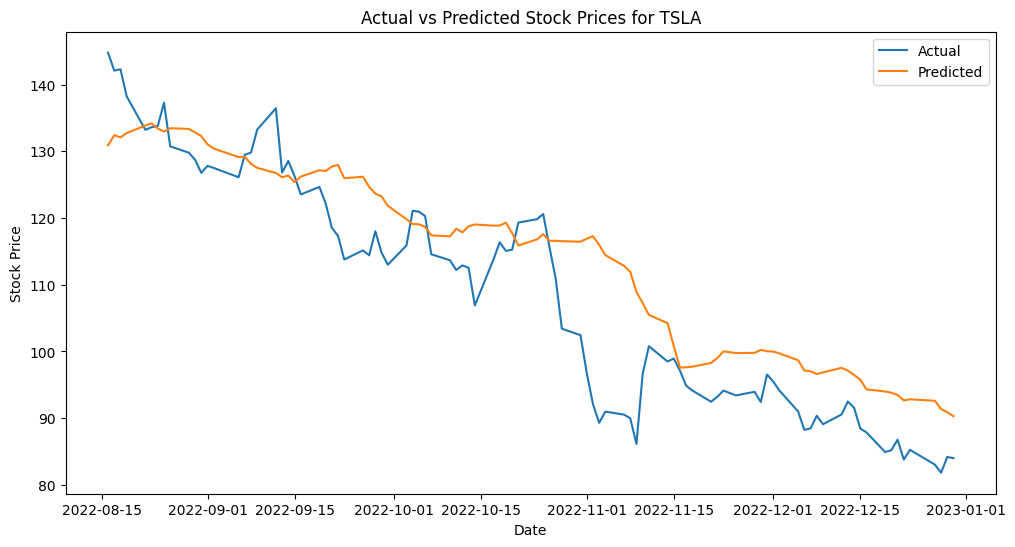

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), len(features)-1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))), axis=1))[:, 0]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

## CNN hypertuining parameters

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data and reshape for CNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#70 / 15 / 15 split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Model 1: Basic CNN
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))  # Added dropout
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper CNN
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Added another Conv1D layer
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Update the evaluate_model function to include additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic CNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (CNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper CNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2394 - val_loss: 0.0091
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_loss: 0.0022
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 5.7823e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9726e-04 - val_loss: 6.2960e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6540e-04 - val_loss: 6.5019e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4201e-04 - val_loss: 5.4696e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5028e-04 - val_loss: 5.6900e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0851e-04 - val_loss: 5.8606e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1550e-04 - val_loss: 5.8097e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4560e-04 - val_loss: 5.5018e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3241e-04 - val_loss: 5.7796e-04
Epoch 

## CNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Feature Selection
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
X = df[feature_columns].values
y = df['Close'].values


# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 2)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 12s]
val_loss: 9.741708755493164

Best val_loss So Far: 9.741708755493164
Total elapsed time: 00h 02m 03s
Best Hyperparameters:
Number of Layers: 2
Filters: 128
Dropout Rate: 0.5
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 228.1222 - mean_absolute_error: 11.2798 - mean_squared_error: 228.1222 - val_loss: 31.2138 - val_mean_absolute_error: 4.8875 - val_mean_squared_error: 31.2138
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 256.2019 - mean_absolute_error: 12.2741 - mean_squared_error: 256.2019 - val_loss: 10.2134 - val_mean_absolute_error: 2.4142 - val_mean_squared_error: 10.2134
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 227.2318 - mean_absolute_error: 11.6439 - mean_squared_error: 227.2318 - val_loss: 10.4906 - val_mean_absolute_error: 2.4606 - val_mean_squared_error: 10.4906
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 248.0557 - mean_absolute_error: 11.6212 - mean_squared_error: 248.0557 - val_loss: 11.6156 - val_mean_absolute_error: 2.6165 - val_mean_squared_error: 11.6156
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 256.6848 - mean_absolute_error: 12.0729 - mean_squared_error: 256.6848 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 322.6490 - mean_absolute_error: 13.0634 - mean_squared_error: 322.6490 - val_loss: 27.8847 - val_mean_absolute_error: 4.3068 - val_mean_squared_error: 27.8847
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 313.3925 - mean_absolute_error: 13.2049 - mean_squared_error: 313.3925 - val_loss: 32.2419 - val_mean_absolute_error: 4.7671 - val_mean_squared_error: 32.2419
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 287.7638 - mean_absolute_error: 12.8678 - mean_squared_error: 287.7638 - val_loss: 28.2152 - val_mean_absolute_error: 4.2677 - val_mean_squared_error: 28.2152
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 341.2921 - mean_absolute_error: 13.4885 - mean_squared_error: 341.2921 - val_loss: 35.0143 - val_mean_absolute_error: 4.3544 - val_mean_squared_error: 35.0143
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 315.6226 - mean_absolute_error: 13.0478 - mean_squared_error: 315.6226 - val_loss: 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Reloading Tuner from project_dir/CNN1_Stock_Prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 2
Filters: 128
Dropout Rate: 0.5
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 187.0935 - mean_absolute_error: 10.5144 - mean_squared_error: 187.0935 - val_loss: 25.2902 - val_mean_absolute_error: 3.9047 - val_mean_squared_error: 25.2902
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 179.9779 - mean_absolute_error: 10.3687 - mean_squared_error: 179.9779 - val_loss: 28.9645 - val_mean_absolute_error: 4.2182 - val_mean_squared_error: 28.9645
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 190.6237 - mean_absolute_error: 10.5455 - mean_squared_error: 190.6237 - val_loss: 17.7504 - val_mean_absolute_error: 3.1049 - val_mean_squared_error: 17.7504
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 201.3334 - mean_absolute_error: 10.9358 - mean_squared_error: 201.3334 - val_loss: 15.9046 - val_mean_absolute_error: 2.9736 - val_mean_squared_error: 15.9046
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 191.3848 - mean_absolute_error: 10.7543 - mean_squared_error: 191.3848 - val_loss: 1

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


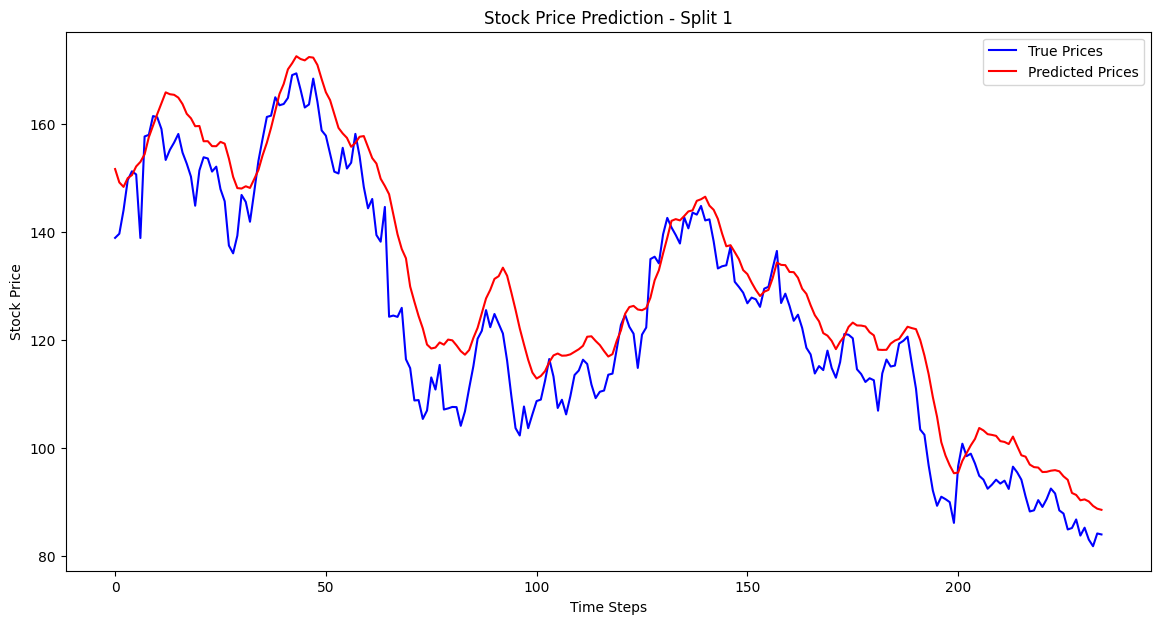

Split 1: MSE: 67.89968407291155, RMSE: 8.240126459764532, MAE: 6.8166984395777925, R²: 0.8708469457562927
Split 2: MSE: 31.077701984486502, RMSE: 5.5747378399783525, MAE: 4.341062217760998, R²: 0.8837821468806795
Split 3: MSE: 36.013004334039465, RMSE: 6.001083596654813, MAE: 4.927676216101113, R²: 0.9543094663844746


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 67.89968407291155, RMSE: 8.240126459764532, MAE: 6.8166984395777925, R²: 0.8708469457562927
Metrics for the 80/10/10 split: MSE: 31.077701984486502, RMSE: 5.5747378399783525, MAE: 4.341062217760998, R²: 0.8837821468806795
Metrics for the 60/20/20 split: MSE: 36.013004334039465, RMSE: 6.001083596654813, MAE: 4.927676216101113, R²: 0.9543094663844746


In [ ]:
CNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,293 (798.02 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,196 (532.02 KB)

In [ ]:
# Save the best model
CNN_1_model_2.save('CNN1_best_model.h5')

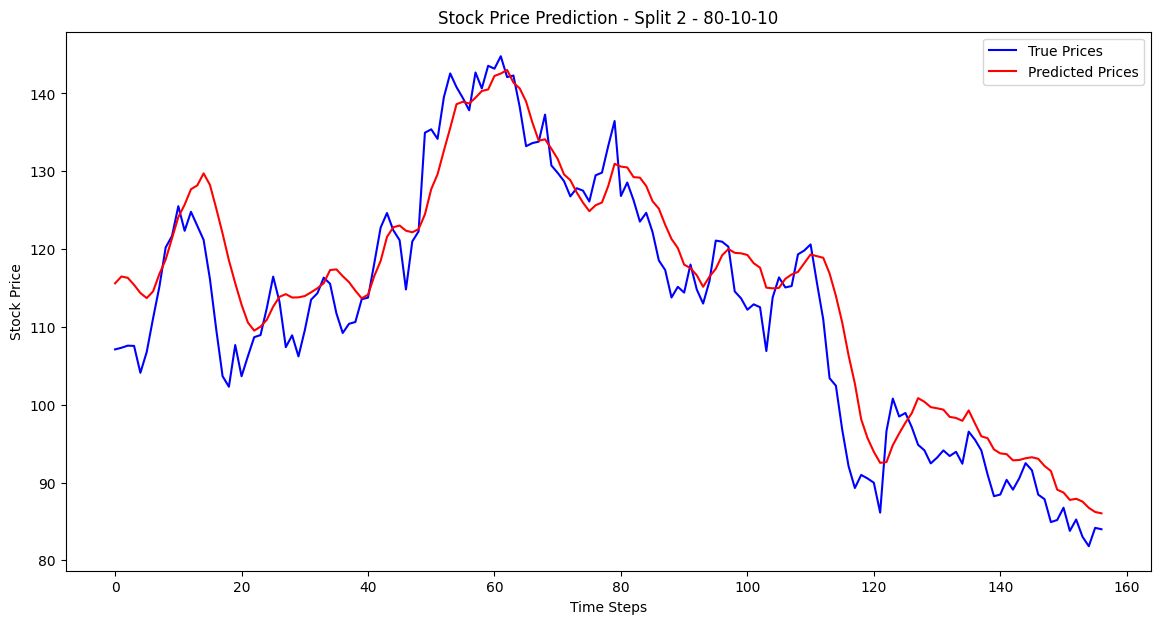

Split 1: MSE: 31.077701984486502, RMSE: 5.5747378399783525, MAE: 4.341062217760998, R²: 0.8837821468806795


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2 - 80-10-10')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CNN1_best_model.h5')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


## CNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values


# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

<ipython-input-41-0c04ee5ef44d>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch
[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Increase input layer filters
    model.add(Conv1D(filters=hp.Int('filters', min_value=128, max_value=256, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Added Batch Normalization
    model.add(BatchNormalization())

    # Add more Conv1D layers
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout_2_' + str(i), 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Adjust regularization
    l2_reg = hp.Float('l2_regularization', 0.01, 0.1, step=0.01)
    model.add(Dense(1, kernel_regularizer=l2(l2_reg)))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-4, 1e-5, 1e-6, 1e-7])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    # Print model summary
    model.summary()

    return model

In [ ]:
def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test):
    global best_model, best_mse, best_params

    # Hyperparameter tuning setup
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN2_Stock_Prediction'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Get the best model and its hyperparameters
    current_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Model Training
    history = current_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation on the test set
    y_pred = current_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, current_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_2_model_1 = run_experiment(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_2_model_2 = run_experiment(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_2_model_3 = run_experiment(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 21s]
val_loss: 27988.115234375

Best val_loss So Far: 52.95718002319336
Total elapsed time: 00h 03m 55s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,881 (214.38 KB)

 Trainable params: 54,561 (213.13 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1684.0972 - mean_absolute_error: 36.9042 - mean_squared_error: 1683.8252 - val_loss: 218.2257 - val_mean_absolute_error: 12.9522 - val_mean_squared_error: 217.9492
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1452.6449 - mean_absolute_error: 33.8241 - mean_squared_error: 1452.3671 - val_loss: 535.6406 - val_mean_absolute_error: 21.9696 - val_mean_squared_error: 535.3583
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1376.2877 - mean_absolute_error: 32.7427 - mean_squared_error: 1376.0042 - val_loss: 806.7325 - val_mean_absolute_error: 27.4880 - val_mean_squared_error: 806.4446
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1256.3367 - mean_absolute_error: 30.7823 - mean_squared_error: 1256.0472 - val_loss: 1186.3893 - val_mean_absolute_error: 33.7425 - val_mean_squared_error: 1186.0962
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1069.0040 - mean_absolute_error: 28.4431 - mean_squared_error:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,881 (214.38 KB)

 Trainable params: 54,561 (213.13 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2638.4487 - mean_absolute_error: 47.4969 - mean_squared_error: 2638.1765 - val_loss: 59.8451 - val_mean_absolute_error: 6.2489 - val_mean_squared_error: 59.5676
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2434.2300 - mean_absolute_error: 45.0445 - mean_squared_error: 2433.9509 - val_loss: 66.1665 - val_mean_absolute_error: 6.6263 - val_mean_squared_error: 65.8821
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2279.7922 - mean_absolute_error: 43.4775 - mean_squared_error: 2279.5059 - val_loss: 95.3817 - val_mean_absolute_error: 8.1310 - val_mean_squared_error: 95.0904
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1706.4521 - mean_absolute_error: 36.4416 - mean_squared_error: 1706.1591 - val_loss: 139.3858 - val_mean_absolute_error: 10.0936 - val_mean_squared_error: 139.0876
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1702.4536 - mean_absolute_error: 35.7338 - mean_squared_error: 1702.1538 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 160)              │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 160)              │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 160)              │          51,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 160)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,881 (214.38 KB)

 Trainable params: 54,561 (213.13 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1073.1356 - mean_absolute_error: 28.2372 - mean_squared_error: 1072.8640 - val_loss: 359.6817 - val_mean_absolute_error: 16.7123 - val_mean_squared_error: 359.4080
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1022.6121 - mean_absolute_error: 27.3096 - mean_squared_error: 1022.3376 - val_loss: 1208.8865 - val_mean_absolute_error: 32.9542 - val_mean_squared_error: 1208.6099
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 823.2462 - mean_absolute_error: 23.9557 - mean_squared_error: 822.9687 - val_loss: 2336.0408 - val_mean_absolute_error: 46.8370 - val_mean_squared_error: 2335.7607
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 827.3217 - mean_absolute_error: 24.0820 - mean_squared_error: 827.0412 - val_loss: 3219.5791 - val_mean_absolute_error: 55.4192 - val_mean_squared_error: 3219.2966
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 726.8847 - mean_absolute_error: 22.8387 - mean_squared_error: 

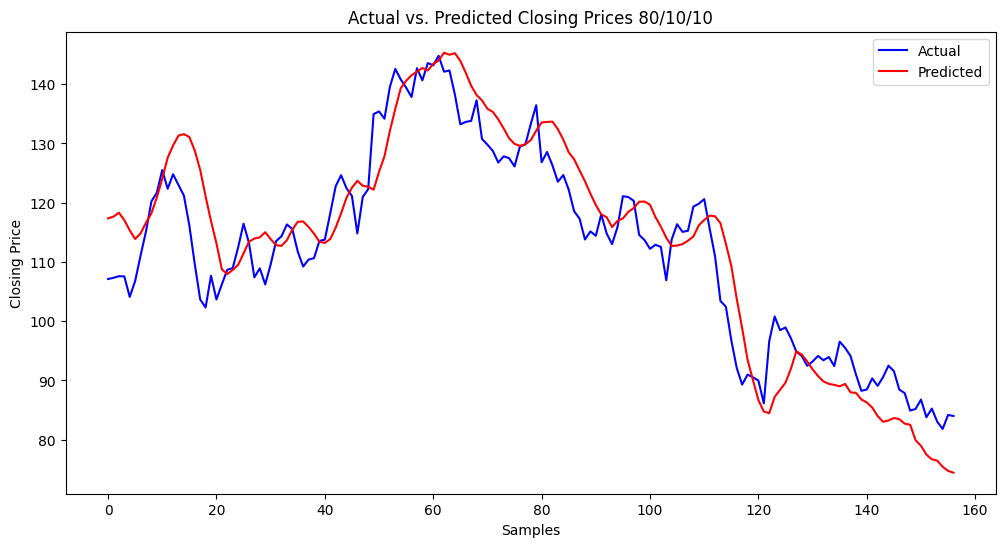

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## CNN Combine 3

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Compute MACD
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()

    # Compute Bollinger Bands
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)

    # Calculate Volatility as Percentage Change
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

    # Extract Day, Month, Year
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
X = df[feature_columns].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))  # Output layer for regression
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN3_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)  # 30% for val+test
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)  # 15% for each

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)  # 20% for val+test
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)  # 10% for each

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)  # 40% for val+test
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)  # 20% for each

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 09s]
val_loss: 9.000410079956055

Best val_loss So Far: 9.000410079956055
Total elapsed time: 00h 02m 40s
Best Hyperparameters:
Number of Layers: 1
Filters: 96
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 134.9888 - mean_absolute_error: 8.8106 - mean_squared_error: 134.9888 - val_loss: 30.4476 - val_mean_absolute_error: 4.8582 - val_mean_squared_error: 30.4476
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103.4918 - mean_absolute_error: 7.4168 - mean_squared_error: 103.4918 - val_loss: 44.7979 - val_mean_absolute_error: 5.9572 - val_mean_squared_error: 44.7979
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.7955 - mean_absolute_error: 7.7508 - mean_squared_error: 102.7955 - val_loss: 29.7481 - val_mean_absolute_error: 4.7715 - val_mean_squared_error: 29.7481
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90.9648 - mean_absolute_error: 7.0792 - mean_squared_error: 90.9648 - val_loss: 178.9383 - val_mean_absolute_error: 12.9918 - val_mean_squared_error: 178.9383
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.8869 - mean_absolute_error: 8.4331 - mean_squared_error: 127.8869 - val_loss: 18.703

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 133.4861 - mean_absolute_error: 8.8419 - mean_squared_error: 133.4861 - val_loss: 242.1142 - val_mean_absolute_error: 14.8825 - val_mean_squared_error: 242.1142
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.7418 - mean_absolute_error: 7.9900 - mean_squared_error: 118.7418 - val_loss: 32.4245 - val_mean_absolute_error: 4.8626 - val_mean_squared_error: 32.4245
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.6905 - mean_absolute_error: 8.2414 - mean_squared_error: 124.6905 - val_loss: 51.8203 - val_mean_absolute_error: 6.2870 - val_mean_squared_error: 51.8203
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126.7736 - mean_absolute_error: 8.1798 - mean_squared_error: 126.7736 - val_loss: 25.6498 - val_mean_absolute_error: 3.9896 - val_mean_squared_error: 25.6498
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.5407 - mean_absolute_error: 8.1764 - mean_squared_error: 122.5407 - val_loss: 42.3

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 89.2359 - mean_absolute_error: 7.3094 - mean_squared_error: 89.2359 - val_loss: 48.6097 - val_mean_absolute_error: 6.2399 - val_mean_squared_error: 48.6097
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.2601 - mean_absolute_error: 6.4291 - mean_squared_error: 69.2601 - val_loss: 16.0417 - val_mean_absolute_error: 3.3149 - val_mean_squared_error: 16.0417
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.1163 - mean_absolute_error: 6.5456 - mean_squared_error: 73.1163 - val_loss: 10.9974 - val_mean_absolute_error: 2.6291 - val_mean_squared_error: 10.9974
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 64.3283 - mean_absolute_error: 6.2218 - mean_squared_error: 64.3283 - val_loss: 12.3816 - val_mean_absolute_error: 2.8210 - val_mean_squared_error: 12.3816
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.3933 - mean_absolute_error: 6.2750 - mean_squared_error: 68.3933 - val_loss: 10.7541 - val_me

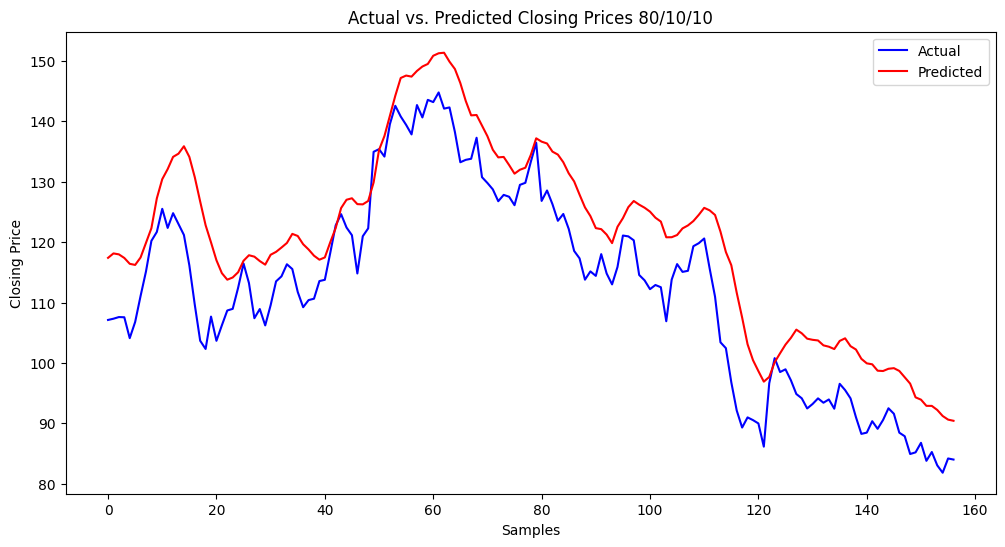

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# RNN

## RNN 10

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get AMZN stock data for the past 10 years
data = yf.download('AMZN', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.1053 - mae: 0.1922 - mse: 0.1053
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 4.1787e-04 - mae: 0.0152 - mse: 4.1787e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.5325e-04 - mae: 0.0144 - mse: 3.5325e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.8337e-04 - mae: 0.0124 - mse: 2.8337e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1150e-04 - mae: 0.0135 - mse: 3.1150e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0879e-04 - mae: 0.0100 - mse: 2.0879e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4606e-04 - mae: 0.0118 - mse: 2.4606e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0807e-04 - mae: 0.0107 - mse: 2.0807e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 1.8974e-04 - mae: 0.0101 - mse: 1.8974e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.8572e-04 - mae: 0.0104 - ms

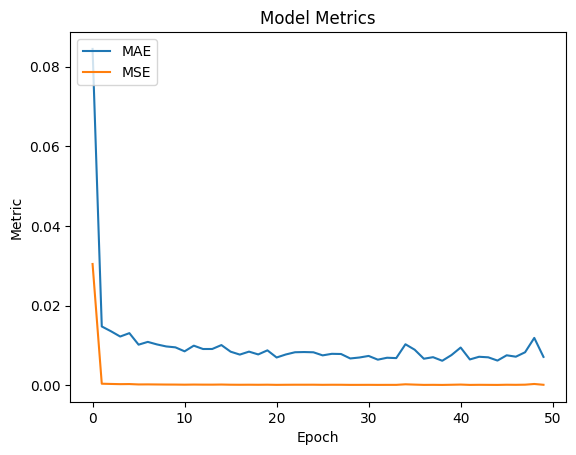

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN 5 Years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get AMZN stock data for the past 5 years
data = yf.download('AMZN', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.3647 - mae: 0.3985 - mse: 0.3647
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0029 - mae: 0.0441 - mse: 0.0029
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019 - mae: 0.0340 - mse: 0.0019
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0018 - mae: 0.0328 - mse: 0.0018
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016 - mae: 0.0293 - mse: 0.0016
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0014 - mae: 0.0297 - mse: 0.0014
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0013 - mae: 0.0267 - mse: 0.0013
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - mae: 0.0257 - mse: 0.0011
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011 - mae: 0.0250 - mse: 0.0011
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - mae: 0.0239 - mse: 0.0010
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0011 - m

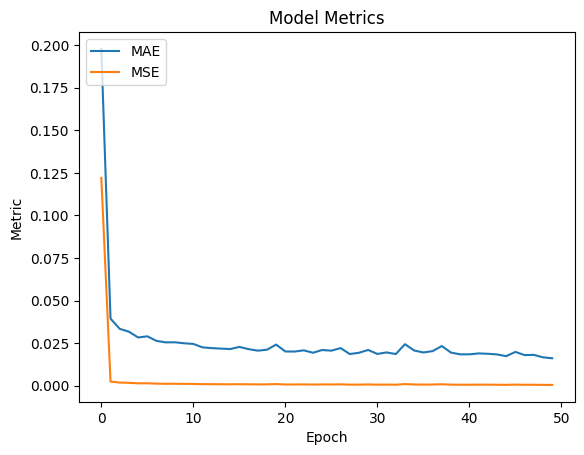

In [ ]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN Feature Engineering

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for AMZN for 7 years
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('AMZN', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Calculate RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training, validation, and test sets (70/15/15 split)
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.15)
test_size = len(scaled_data) - train_size - val_size
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

In [ ]:
# Create sequences for predicting 'Close' price
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
target_feature_index = features.index('Close')
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Build RNN model to predict 'Close' value
RNN3 = Sequential()
RNN3.add(SimpleRNN(units=64, activation='relu', input_shape=(seq_length, len(features))))
RNN3.add(Dense(units=1))

# Compile the model
RNN3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = RNN3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0215 - mae: 0.1090 - mape: 6641.7646 - mse: 0.0215 - val_loss: 0.0078 - val_mae: 0.0802 - val_mape: 9.3643 - val_mse: 0.0078
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0276 - mape: 4641.4204 - mse: 0.0012 - val_loss: 0.0018 - val_mae: 0.0351 - val_mape: 4.0867 - val_mse: 0.0018
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3839e-04 - mae: 0.0216 - mape: 9242.9170 - mse: 7.3839e-04 - val_loss: 7.6778e-04 - val_mae: 0.0220 - val_mape: 2.5376 - val_mse: 7.6778e-04
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5984e-04 - mae: 0.0160 - mape: 505.4902 - mse: 4.5984e-04 - val_loss: 8.9486e-04 - val_mae: 0.0223 - val_mape: 2.6129 - val_mse: 8.9486e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9777e-04 - mae: 0.0127 - mape: 6334.2588 - mse: 2.9777e-04 - val_loss: 6.1529e-04 - val_mae: 0.0193 - val_mape: 2.2250 - val_mse: 6.1529e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 

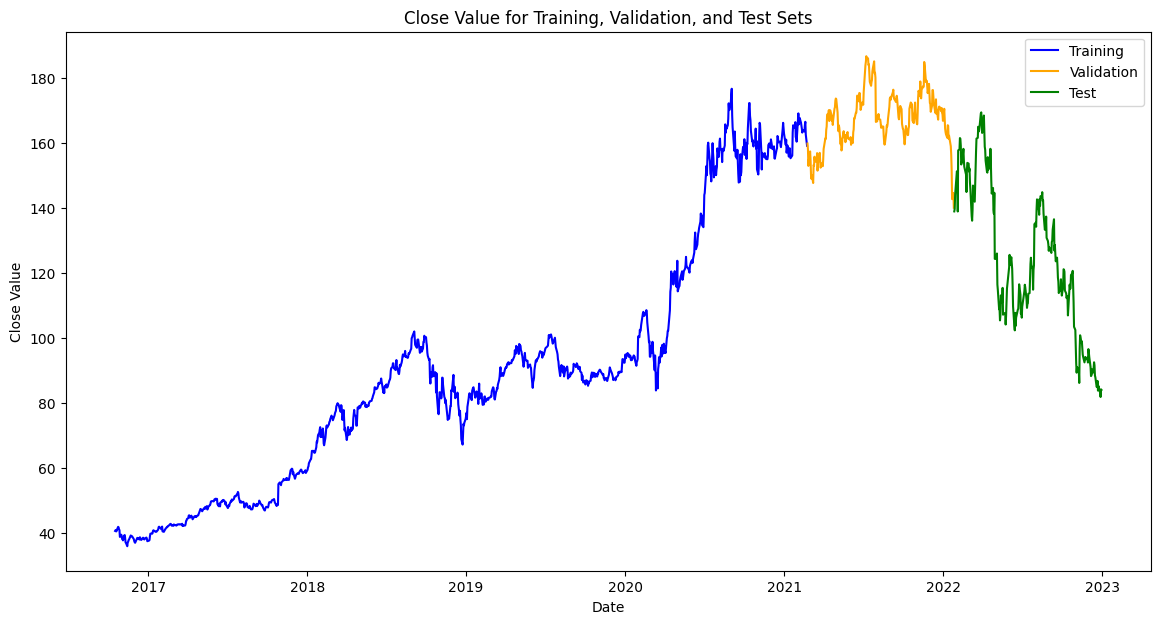

In [ ]:
import matplotlib.pyplot as plt

# Obtain the dates for each subset
train_dates = df.index[:train_size]
val_dates = df.index[train_size:train_size + val_size]
test_dates = df.index[train_size + val_size:]

# Obtain the close values for each subset
train_close = df['Close'][:train_size]
val_close = df['Close'][train_size:train_size + val_size]
test_close = df['Close'][train_size + val_size:]

# Plot the close value for each subset
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_close, label='Training', color='blue')
plt.plot(val_dates, val_close, label='Validation', color='orange')
plt.plot(test_dates, test_close, label='Test', color='green')

plt.title('Close Value for Training, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
RMSE: 7.9883501561518875
MAE: 6.354934338717349
MSE: 63.813738217291885
R-squared: 0.8789896542727487


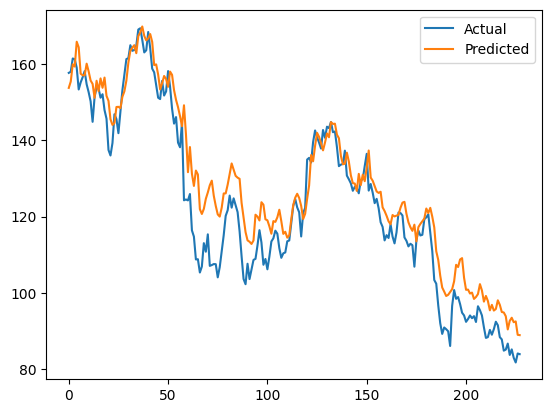

In [ ]:
# Make predictions for 'Close' value
predictions = RNN3.predict(X_test).flatten()
predictions = np.expand_dims(predictions, axis=1)
predictions = np.concatenate((predictions, np.zeros((len(predictions), len(features) - 1))), axis=1)
predictions = scaler.inverse_transform(predictions)[:, 0]

y_test = y_test.reshape(-1, 1)
y_test = np.concatenate((y_test, np.zeros((len(y_test), len(features) - 1))), axis=1)
y_test = scaler.inverse_transform(y_test)[:, 0]

# Evaluate the model for 'Close' value prediction
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics for 'Close' value prediction
print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

## RNN hypertunining parameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Model 1: Basic RNN
model1 = Sequential()
model1.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: RNN with Dropout
model2 = Sequential()
model2.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper RNN
model3 = Sequential()
model3.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(SimpleRNN(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic RNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (RNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper RNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1439 - val_loss: 0.0012
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3014e-04 - val_loss: 2.7196e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1021e-04 - val_loss: 2.8488e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6767e-04 - val_loss: 3.6470e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0542e-04 - val_loss: 2.7510e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0742e-04 - val_loss: 2.6325e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6972e-04 - val_loss: 4.9621e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0371e-04 - val_loss: 2.9885e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9793e-04 - val_loss: 2.5205e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7174e-04 - val_loss: 3.5278e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5108e-04 - val_loss: 3.157

## RNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping


# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Select only the specified feature columns
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Function to build RNN model
def build_model(hp):
    model = Sequential()
    for _ in range(hp.Int('num_layers', 1, 3)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10), activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
# Function to run the RNN model
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 13s]
val_loss: 10.344069480895996

Best val_loss So Far: 10.126557350158691
Total elapsed time: 00h 02m 14s
Best Hyperparameters:
Number of Layers: 1
units: 70
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 184.8593 - mean_absolute_error: 9.9126 - mean_squared_error: 184.8593 - val_loss: 17.0407 - val_mean_absolute_error: 3.3388 - val_mean_squared_error: 17.0407
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 190.9196 - mean_absolute_error: 10.3034 - mean_squared_error: 190.9196 - val_loss: 10.8430 - val_mean_absolute_error: 2.5778 - val_mean_squared_error: 10.8430
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 164.7588 - mean_absolute_error: 9.6761 - mean_squared_error: 164.7588 - val_loss: 10.1941 - val_mean_absolute_error: 2.4590 - val_mean_squared_error: 10.1941
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.1549 - mean_absolute_error: 9.2624 - mean_squared_error: 155.1549 - val_loss: 23.5919 - val_mean_absolute_error: 4.0006 - val_mean_squared_error: 23.5919
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 175.3685 - mean_absolute_error: 9.6093 - mean_squared_error: 175.3685 - val_loss: 15.11

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 220.7654 - mean_absolute_error: 10.8586 - mean_squared_error: 220.7654 - val_loss: 52.1377 - val_mean_absolute_error: 5.7295 - val_mean_squared_error: 52.1377
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 212.4998 - mean_absolute_error: 10.5622 - mean_squared_error: 212.4998 - val_loss: 29.9439 - val_mean_absolute_error: 4.0331 - val_mean_squared_error: 29.9439
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 194.2982 - mean_absolute_error: 10.4359 - mean_squared_error: 194.2982 - val_loss: 33.6600 - val_mean_absolute_error: 4.8559 - val_mean_squared_error: 33.6600
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 227.1597 - mean_absolute_error: 10.7313 - mean_squared_error: 227.1597 - val_loss: 70.7620 - val_mean_absolute_error: 6.9088 - val_mean_squared_error: 70.7620
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 218.8900 - mean_absolute_error: 10.8891 - mean_squared_error: 218.8900 - val_loss: 2

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 115.5507 - mean_absolute_error: 8.0382 - mean_squared_error: 115.5507 - val_loss: 19.7859 - val_mean_absolute_error: 3.2807 - val_mean_squared_error: 19.7859
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.8525 - mean_absolute_error: 8.0503 - mean_squared_error: 107.8525 - val_loss: 16.9285 - val_mean_absolute_error: 3.3091 - val_mean_squared_error: 16.9285
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.8883 - mean_absolute_error: 8.3038 - mean_squared_error: 117.8883 - val_loss: 32.6684 - val_mean_absolute_error: 4.4932 - val_mean_squared_error: 32.6684
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.7299 - mean_absolute_error: 8.5485 - mean_squared_error: 123.7299 - val_loss: 17.0796 - val_mean_absolute_error: 3.2884 - val_mean_squared_error: 17.0796
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126.1615 - mean_absolute_error: 8.6482 - mean_squared_error: 126.1615 - val_loss: 19.999

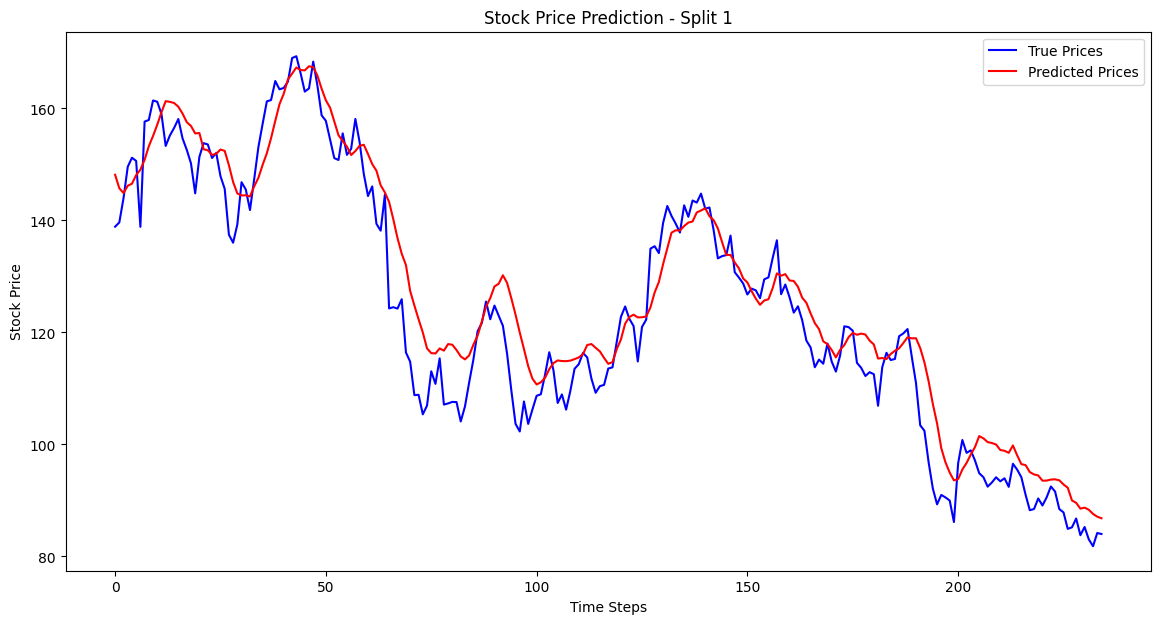

Split 1: MSE: 41.15348823585751, RMSE: 6.415098458781245, MAE: 5.033859610050283, R²: 0.9217213044358785
Split 2: MSE: 28.37845708302498, RMSE: 5.3271434261736355, MAE: 4.18494954686256, R²: 0.8938762152145519
Split 3: MSE: 30.383161428046023, RMSE: 5.512092291321511, MAE: 4.203863320640101, R²: 0.9614521786158806


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 41.15348823585751, RMSE: 6.415098458781245, MAE: 5.033859610050283, R²: 0.9217213044358785
Metrics for the 80/10/10 split: MSE: 28.37845708302498, RMSE: 5.3271434261736355, MAE: 4.18494954686256, R²: 0.8938762152145519
Metrics for the 60/20/20 split: MSE: 30.383161428046023, RMSE: 5.512092291321511, MAE: 4.203863320640101, R²: 0.9614521786158806


In [ ]:
RNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 70)               │           5,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 70)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,805 (65.65 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [ ]:
# Save the best model
RNN_1_model_2.save('RNN1_best_model.h5')

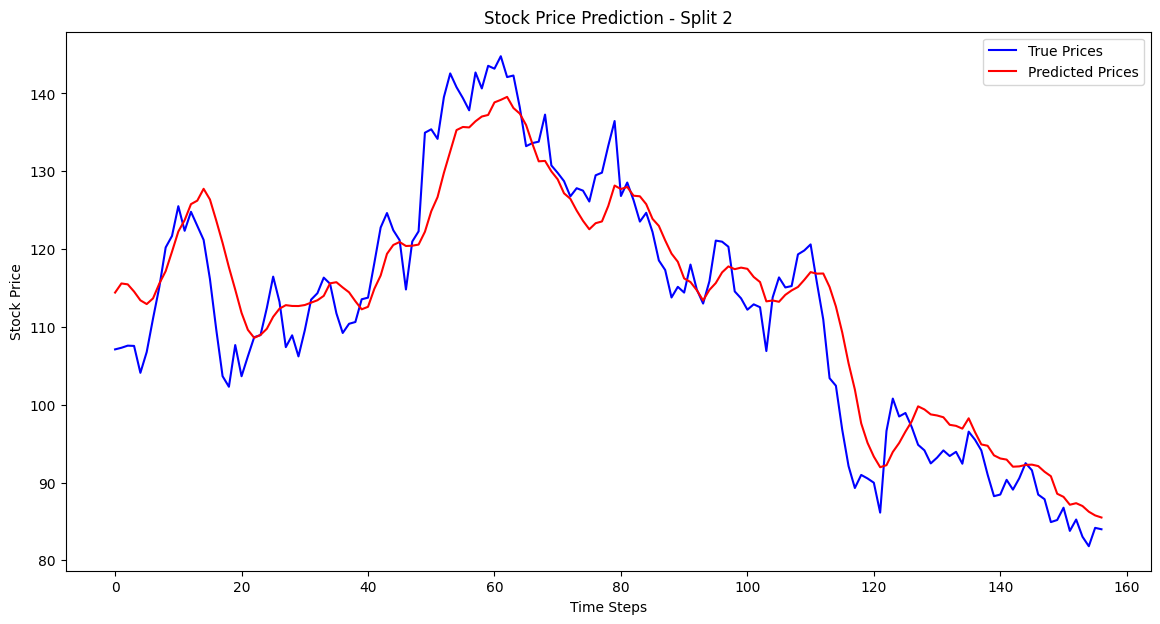

Split 2: MSE: 28.37845708302498, RMSE: 5.3271434261736355, MAE: 4.18494954686256, R²: 0.8938762152145519


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

## RNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch


# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

[*********************100%***********************]  1 of 1 completed


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Add SimpleRNN layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10),
                           activation=activation,
                           return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN2_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])


    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_2_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_2_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_2_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 29s]
val_loss: 17483.615234375

Best val_loss So Far: 10.08462142944336
Total elapsed time: 00h 02m 50s
Best Hyperparameters:
Number of Layers: 1
units: 120
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 149.7218 - mean_absolute_error: 9.0708 - mean_squared_error: 149.7218 - val_loss: 11.7174 - val_mean_absolute_error: 2.6353 - val_mean_squared_error: 11.7174
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.2754 - mean_absolute_error: 9.3094 - mean_squared_error: 158.2754 - val_loss: 11.5399 - val_mean_absolute_error: 2.6165 - val_mean_squared_error: 11.5399
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138.7307 - mean_absolute_error: 8.7543 - mean_squared_error: 138.7307 - val_loss: 10.9575 - val_mean_absolute_error: 2.5633 - val_mean_squared_error: 10.9575
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149.5523 - mean_absolute_error: 9.1302 - mean_squared_error: 149.5523 - val_loss: 41.2104 - val_mean_absolute_error: 5.6689 - val_mean_squared_error: 41.2104
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.4204 - mean_absolute_error: 9.1260 - mean_squared_error: 150.4204 - val_loss: 15.050

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 174.9296 - mean_absolute_error: 9.6781 - mean_squared_error: 174.9296 - val_loss: 38.7111 - val_mean_absolute_error: 4.6526 - val_mean_squared_error: 38.7111
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 213.9281 - mean_absolute_error: 10.7243 - mean_squared_error: 213.9281 - val_loss: 28.0369 - val_mean_absolute_error: 4.1827 - val_mean_squared_error: 28.0369
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 200.1062 - mean_absolute_error: 10.4594 - mean_squared_error: 200.1062 - val_loss: 29.0991 - val_mean_absolute_error: 4.0621 - val_mean_squared_error: 29.0991
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216.6351 - mean_absolute_error: 10.7802 - mean_squared_error: 216.6351 - val_loss: 44.0503 - val_mean_absolute_error: 5.0310 - val_mean_squared_error: 44.0503
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.5424 - mean_absolute_error: 9.1544 - mean_squared_error: 151.5424 - val_loss: 36.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 99.1393 - mean_absolute_error: 7.8099 - mean_squared_error: 99.1393 - val_loss: 16.8722 - val_mean_absolute_error: 3.0953 - val_mean_squared_error: 16.8722
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.4834 - mean_absolute_error: 7.8045 - mean_squared_error: 102.4834 - val_loss: 17.5680 - val_mean_absolute_error: 3.1013 - val_mean_squared_error: 17.5680
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.3981 - mean_absolute_error: 7.5706 - mean_squared_error: 95.3981 - val_loss: 22.6218 - val_mean_absolute_error: 3.5345 - val_mean_squared_error: 22.6218
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.2831 - mean_absolute_error: 8.6136 - mean_squared_error: 124.2831 - val_loss: 32.6651 - val_mean_absolute_error: 4.4836 - val_mean_squared_error: 32.6651
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.6958 - mean_absolute_error: 7.6898 - mean_squared_error: 102.6958 - val_loss: 18.9406 - 

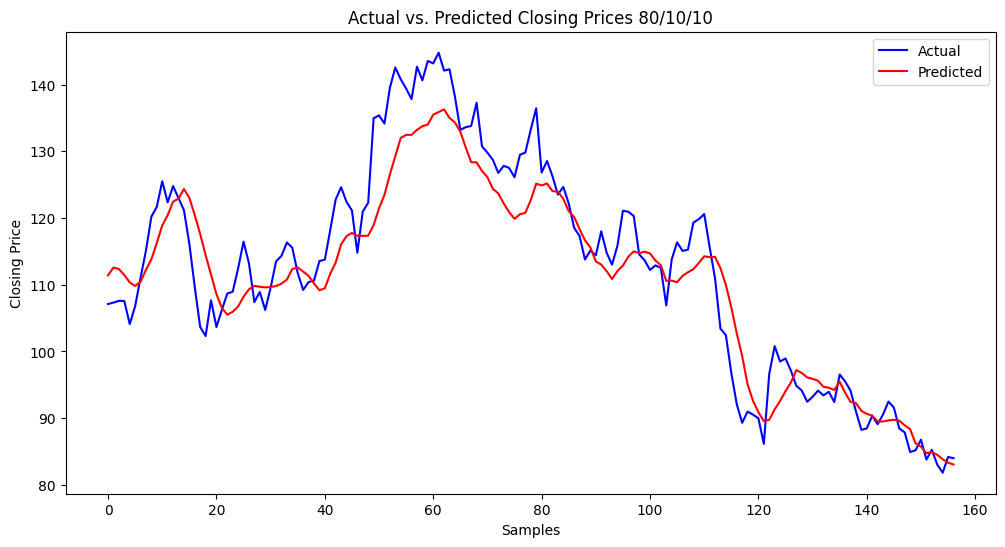

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## RNN Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]

# Prepare data
X = df[feature_columns].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add SimpleRNN layer
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu', return_sequences=True))

    # Adding additional SimpleRNN layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                             activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Final RNN layer without return_sequences
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu'))

    # Output layer for regression
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 35s]
val_loss: 17.80411148071289

Best val_loss So Far: 17.80411148071289
Total elapsed time: 00h 06m 02s
Best Hyperparameters:
Number of Layers: 2
units: 128
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 583.6387 - mean_absolute_error: 18.1284 - mean_squared_error: 583.6387 - val_loss: 98.4263 - val_mean_absolute_error: 8.9047 - val_mean_squared_error: 98.4263
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 48.0912 - mean_absolute_error: 5.2394 - mean_squared_error: 48.0912 - val_loss: 49.6315 - val_mean_absolute_error: 6.0465 - val_mean_squared_error: 49.6315
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 29.0926 - mean_absolute_error: 4.1919 - mean_squared_error: 29.0926 - val_loss: 151.0097 - val_mean_absolute_error: 11.6679 - val_mean_squared_error: 151.0097
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 30.6069 - mean_absolute_error: 4.1150 - mean_squared_error: 30.6069 - val_loss: 379.1824 - val_mean_absolute_error: 19.1123 - val_mean_squared_error: 379.1824
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 37.4981 - mean_absolute_error: 4.5941 - mean_squared_error: 37.4981 - val_loss: 203

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 594.1824 - mean_absolute_error: 16.9120 - mean_squared_error: 594.1824 - val_loss: 65.3247 - val_mean_absolute_error: 7.0540 - val_mean_squared_error: 65.3247
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 38.0512 - mean_absolute_error: 4.6632 - mean_squared_error: 38.0512 - val_loss: 239.6886 - val_mean_absolute_error: 14.1749 - val_mean_squared_error: 239.6886
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 46.9395 - mean_absolute_error: 5.1047 - mean_squared_error: 46.9395 - val_loss: 51.5264 - val_mean_absolute_error: 6.1779 - val_mean_squared_error: 51.5264
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 44.5179 - mean_absolute_error: 5.0838 - mean_squared_error: 44.5179 - val_loss: 61.5841 - val_mean_absolute_error: 6.8740 - val_mean_squared_error: 61.5841
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 62.7833 - mean_absolute_error: 5.9814 - mean_squared_error: 62.7833 - val_loss: 131.51

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 496.7764 - mean_absolute_error: 17.7224 - mean_squared_error: 496.7764 - val_loss: 265.3493 - val_mean_absolute_error: 15.6588 - val_mean_squared_error: 265.3493
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 50.1319 - mean_absolute_error: 5.6285 - mean_squared_error: 50.1319 - val_loss: 203.3746 - val_mean_absolute_error: 13.5057 - val_mean_squared_error: 203.3746
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 25.9153 - mean_absolute_error: 3.8453 - mean_squared_error: 25.9153 - val_loss: 291.7268 - val_mean_absolute_error: 16.5394 - val_mean_squared_error: 291.7268
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 28.0253 - mean_absolute_error: 4.1448 - mean_squared_error: 28.0253 - val_loss: 157.4935 - val_mean_absolute_error: 11.8605 - val_mean_squared_error: 157.4935
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 21.3622 - mean_absolute_error: 3.4786 - mean_squared_error: 21.3622 - val_los

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 66.97194562350607, RMSE: 8.18363889865053, MAE: 6.62924564442736, R²: 0.8726116116146989
Metrics for the 80/10/10 split: MSE: 74.67825200862865, RMSE: 8.641657943278515, MAE: 7.159530834027916, R²: 0.720733980669523
Metrics for the 60/20/20 split: MSE: 320.44437338063716, RMSE: 17.90096012454743, MAE: 15.743031462160543, R²: 0.5934447934960245


In [ ]:
RNN_3_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 15, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 15, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,373 (1.32 MB)

 Trainable params: 115,457 (451.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,916 (902.02 KB)

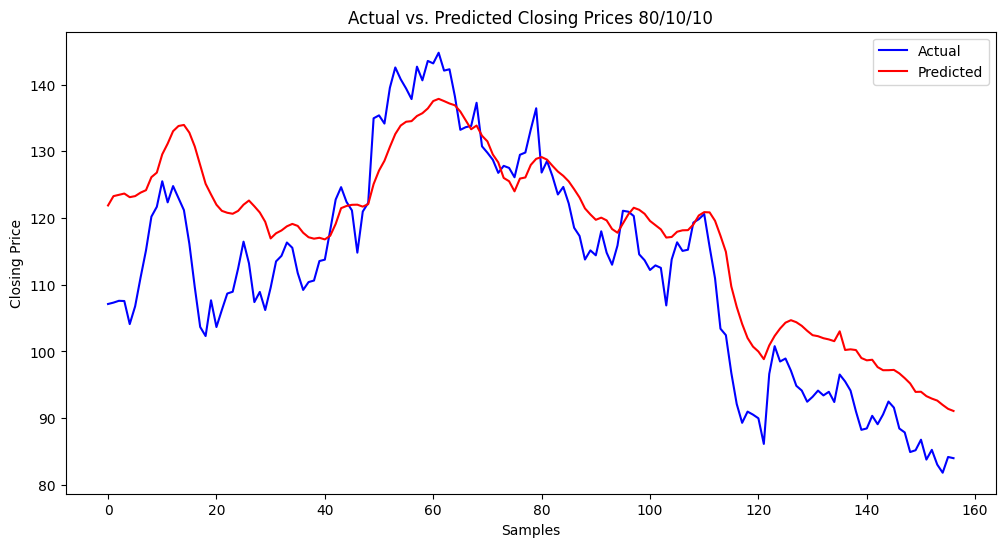

In [ ]:
import matplotlib.pyplot as plt
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM

## LSTM 10 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get AMZN stock data for the past 10 years
data = yf.download('AMZN', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0403 - mae: 0.1170 - mse: 0.0403
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 3.7191e-04 - mae: 0.0122 - mse: 3.7191e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.7539e-04 - mae: 0.0122 - mse: 3.7539e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.6160e-04 - mae: 0.0117 - mse: 3.6160e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.2973e-04 - mae: 0.0111 - mse: 3.2973e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.0058e-04 - mae: 0.0121 - mse: 4.0058e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 3.1381e-04 - mae: 0.0107 - mse: 3.1381e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.0326e-04 - mae: 0.0109 - mse: 3.0326e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0015 - mae: 0.0262 - mse: 0.0015
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 2.6080e-04 - mae: 0.0099 - mse: 2.6080e-04
Epoch 

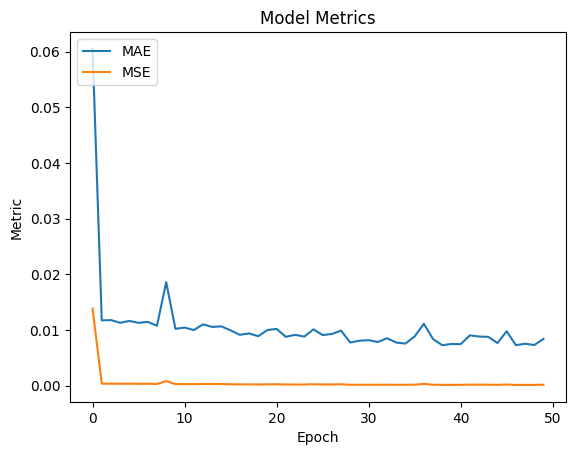

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## lstm 5 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get AMZN stock data for the past 5 years
data = yf.download('AMZN', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.1050 - mae: 0.2260 - mse: 0.1050
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0046 - mae: 0.0555 - mse: 0.0046
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0015 - mae: 0.0286 - mse: 0.0015
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0017 - mae: 0.0311 - mse: 0.0017
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0016 - mae: 0.0289 - mse: 0.0016
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0018 - mae: 0.0321 - mse: 0.0018
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0016 - mae: 0.0305 - mse: 0.0016
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0016 - mae: 0.0298 - mse: 0.0016
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0015 - mae: 0.0285 - mse: 0.0015
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014 - mae: 0.0276 - mse: 0.0014
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss:

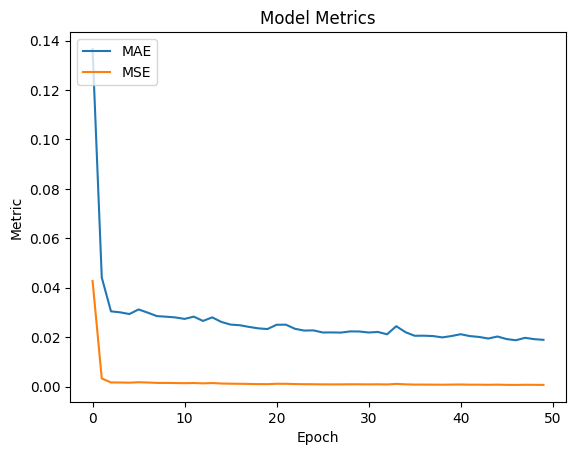

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## LSTM feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for AMZN (7 years)
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('AMZN', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop NaN values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define features and target
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
target = 'Close'

# Extract features and target
data = df[features].values
target_data = df[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target_data)

# Split the data into training, validation, and test sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, scaled_target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
# Create sequences for LSTM
seq_length = 7
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train, y_train, seq_length)
X_val, y_val = create_sequences(X_val, y_val, seq_length)
X_test, y_test = create_sequences(X_test, y_test, seq_length)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
predictions = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0395 - mae: 0.1352 - mse: 0.0395 - val_loss: 0.0053 - val_mae: 0.0601 - val_mse: 0.0053
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019 - mae: 0.0332 - mse: 0.0019 - val_loss: 0.0024 - val_mae: 0.0390 - val_mse: 0.0024
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5204e-04 - mae: 0.0206 - mse: 8.5204e-04 - val_loss: 0.0016 - val_mae: 0.0308 - val_mse: 0.0016
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7666e-04 - mae: 0.0184 - mse: 6.7666e-04 - val_loss: 0.0016 - val_mae: 0.0316 - val_mse: 0.0016
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1250e-04 - mae: 0.0158 - mse: 5.1250e-04 - val_loss: 0.0014 - val_mae: 0.0295 - val_mse: 0.0014
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2155e-04 - mae: 0.0174 - mse: 6.2155e-04 - val_loss: 0.0012 - val_mae: 0.0269 - val_mse: 0.0012
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3963e-04 - mae: 0.0163 - mse

RMSE: 5.9123224819192215
MSE: 34.95555713020746
MAE: 4.5774887151885455
R-squared: 0.9337135831314005


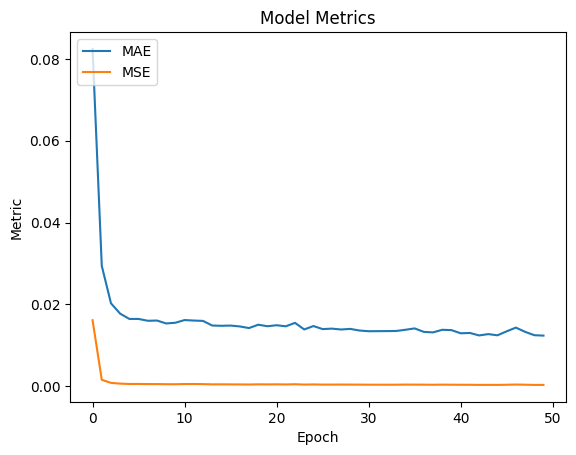

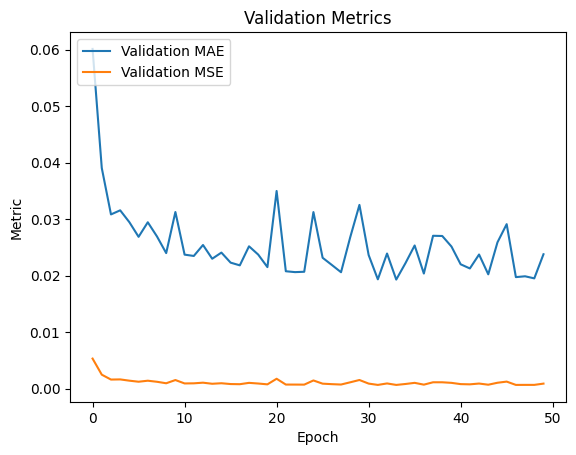

In [ ]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

# Plot validation metrics
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('Validation Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Validation MAE', 'Validation MSE'], loc='upper left')
plt.show()

## lstm  hyperparameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Models
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(LSTM(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1605 - val_loss: 0.0067
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5807e-04 - val_loss: 5.7202e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4552e-04 - val_loss: 4.5140e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1795e-04 - val_loss: 4.9362e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7086e-04 - val_loss: 5.0254e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9750e-04 - val_loss: 5.4068e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6204e-04 - val_loss: 4.1696e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2155e-04 - val_loss: 5.4560e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6911e-04 - val_loss: 4.3713e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9490e-04 - val_loss: 4.0136e-04
E

In [ ]:
# Evaluate models on the test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic LSTM) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (LSTM with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper LSTM) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Model 1 (Basic LSTM) - RMSE: 2.328794017081079 MAE: 1.5896388183940537 MSE: 5.423281573992629 R^2: 0.9975229886295061
Model 2 (LSTM with Dropout) - RMSE: 7.181326056213412 MAE: 6.072137464176523 MSE: 51.571443925649675 R^2: 0.9764454322989213
Model 3 (Deeper LSTM) - RMSE: 16.954162414199114 MAE: 14.352170185609298 MSE: 287.44362316704195 R^2: 0.8687139671347459


## LSTM Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Function to build LSTM model
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 27s]
val_loss: 21382.80078125

Best val_loss So Far: 12.128484725952148
Total elapsed time: 00h 03m 59s
Best Hyperparameters:
Number of Layers: 2
units: 130
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 131.6943 - mean_absolute_error: 9.2624 - mean_squared_error: 131.6943 - val_loss: 57.0722 - val_mean_absolute_error: 6.8100 - val_mean_squared_error: 57.0722
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 130.7979 - mean_absolute_error: 8.9129 - mean_squared_error: 130.7979 - val_loss: 42.6501 - val_mean_absolute_error: 5.7202 - val_mean_squared_error: 42.6501
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103.2169 - mean_absolute_error: 7.9676 - mean_squared_error: 103.2169 - val_loss: 36.8467 - val_mean_absolute_error: 5.2328 - val_mean_squared_error: 36.8467
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 107.9282 - mean_absolute_error: 7.9769 - mean_squared_error: 107.9282 - val_loss: 27.0319 - val_mean_absolute_error: 4.3111 - val_mean_squared_error: 27.0319
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 127.4971 - mean_absolute_error: 8.4590 - mean_squared_error: 127.4971 - val_loss: 11.872

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 150.1891 - mean_absolute_error: 9.8053 - mean_squared_error: 150.1891 - val_loss: 37.4521 - val_mean_absolute_error: 4.8840 - val_mean_squared_error: 37.4521
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 145.0075 - mean_absolute_error: 9.5970 - mean_squared_error: 145.0075 - val_loss: 40.7295 - val_mean_absolute_error: 5.3922 - val_mean_squared_error: 40.7295
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 121.3346 - mean_absolute_error: 8.5775 - mean_squared_error: 121.3346 - val_loss: 56.6312 - val_mean_absolute_error: 6.5612 - val_mean_squared_error: 56.6312
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149.2575 - mean_absolute_error: 9.2403 - mean_squared_error: 149.2575 - val_loss: 39.8059 - val_mean_absolute_error: 5.3143 - val_mean_squared_error: 39.8059
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 122.9150 - mean_absolute_error: 8.5657 - mean_squared_error: 122.9150 - val_loss: 38.149

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 124.6923 - mean_absolute_error: 9.2118 - mean_squared_error: 124.6923 - val_loss: 32.2214 - val_mean_absolute_error: 4.6293 - val_mean_squared_error: 32.2214
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 95.5702 - mean_absolute_error: 7.8447 - mean_squared_error: 95.5702 - val_loss: 175.5857 - val_mean_absolute_error: 12.7760 - val_mean_squared_error: 175.5857
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81.0697 - mean_absolute_error: 7.1412 - mean_squared_error: 81.0697 - val_loss: 183.3538 - val_mean_absolute_error: 13.0757 - val_mean_squared_error: 183.3538
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 85.0294 - mean_absolute_error: 7.1620 - mean_squared_error: 85.0294 - val_loss: 143.7001 - val_mean_absolute_error: 11.4531 - val_mean_squared_error: 143.7001
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 74.2543 - mean_absolute_error: 6.6453 - mean_squared_error: 74.2543 - val_loss: 233

Metrics for the 70/15/15 split: MSE: 66.03166911727205, RMSE: 8.125987270311962, MAE: 6.564454618413397, R²: 0.8744001263076882
Metrics for the 80/10/10 split: MSE: 69.69352757403439, RMSE: 8.348264943929031, MAE: 6.9463789144139385, R²: 0.739374804642581
Metrics for the 60/20/20 split: MSE: 61.76158364302257, RMSE: 7.8588538377439345, MAE: 6.621508759812425, R²: 0.9216416467947294


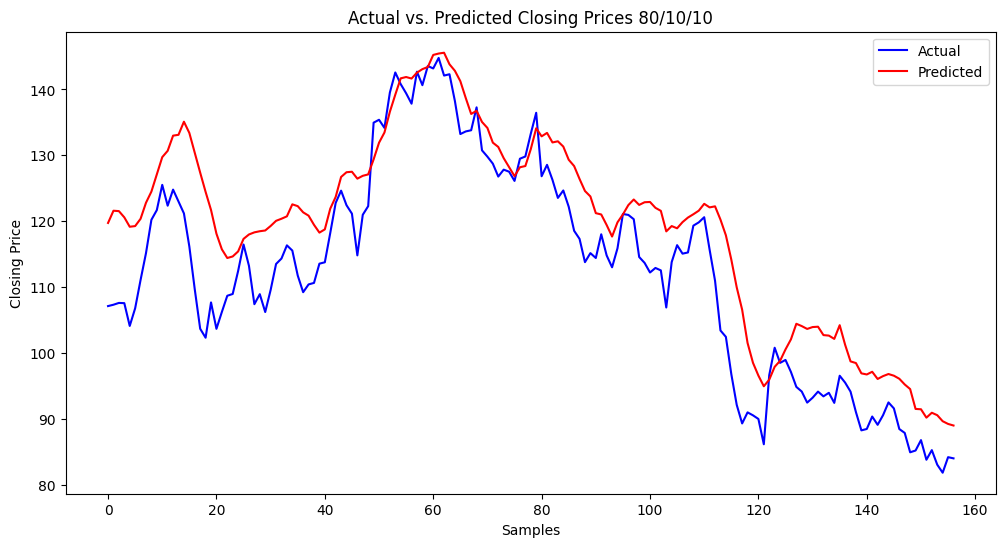

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
# Function to run the LSTM model
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM2_Stock_Prediction'
    )

    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 18s]
val_loss: 43.403839111328125

Best val_loss So Far: 10.670496940612793
Total elapsed time: 00h 03m 47s
Best Hyperparameters:
Number of Layers: 1
Units: 120
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 87.6950 - mean_absolute_error: 7.1285 - mean_squared_error: 87.6950 - val_loss: 88.2185 - val_mean_absolute_error: 8.8371 - val_mean_squared_error: 88.2185
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.3317 - mean_absolute_error: 7.6298 - mean_squared_error: 104.3317 - val_loss: 17.4460 - val_mean_absolute_error: 3.3191 - val_mean_squared_error: 17.4460
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.0833 - mean_absolute_error: 7.5973 - mean_squared_error: 106.0833 - val_loss: 18.8531 - val_mean_absolute_error: 3.4673 - val_mean_squared_error: 18.8531
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.7283 - mean_absolute_error: 7.0669 - mean_squared_error: 91.7283 - val_loss: 12.1637 - val_mean_absolute_error: 2.6094 - val_mean_squared_error: 12.1637
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.1277 - mean_absolute_error: 7.2401 - mean_squared_error: 97.1277 - val_loss: 13.8922 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 113.1582 - mean_absolute_error: 8.1273 - mean_squared_error: 113.1582 - val_loss: 39.0929 - val_mean_absolute_error: 5.3014 - val_mean_squared_error: 39.0929
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 128.2318 - mean_absolute_error: 8.5456 - mean_squared_error: 128.2318 - val_loss: 42.6951 - val_mean_absolute_error: 4.7207 - val_mean_squared_error: 42.6951
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 118.6866 - mean_absolute_error: 8.1247 - mean_squared_error: 118.6866 - val_loss: 32.9634 - val_mean_absolute_error: 4.3804 - val_mean_squared_error: 32.9634
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.1211 - mean_absolute_error: 7.6272 - mean_squared_error: 109.1211 - val_loss: 37.5042 - val_mean_absolute_error: 4.3819 - val_mean_squared_error: 37.5042
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.1869 - mean_absolute_error: 7.7825 - mean_squared_error: 108.1869 - val_loss: 57.575

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 63.4724 - mean_absolute_error: 6.2068 - mean_squared_error: 63.4724 - val_loss: 89.2291 - val_mean_absolute_error: 8.7076 - val_mean_squared_error: 89.2291
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56.2331 - mean_absolute_error: 5.9063 - mean_squared_error: 56.2331 - val_loss: 16.4111 - val_mean_absolute_error: 2.9949 - val_mean_squared_error: 16.4111
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.9325 - mean_absolute_error: 6.6506 - mean_squared_error: 75.9325 - val_loss: 23.0853 - val_mean_absolute_error: 3.5676 - val_mean_squared_error: 23.0853
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.0231 - mean_absolute_error: 5.9731 - mean_squared_error: 61.0231 - val_loss: 55.1240 - val_mean_absolute_error: 6.3781 - val_mean_squared_error: 55.1240
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.5929 - mean_absolute_error: 5.8179 - mean_squared_error: 60.5929 - val_loss: 17.8520 - val_me

Metrics for the 70/15/15 split: MSE: 48.42030877306032, RMSE: 6.958470289730374, MAE: 5.477723239330535, R²: 0.9078989710946389
Metrics for the 80/10/10 split: MSE: 29.320695424891763, RMSE: 5.414858763152716, MAE: 4.194981909101935, R²: 0.8903526304503654
Metrics for the 60/20/20 split: MSE: 43.28905160348645, RMSE: 6.579441587512306, MAE: 5.246557802437974, R²: 0.9450781765073734


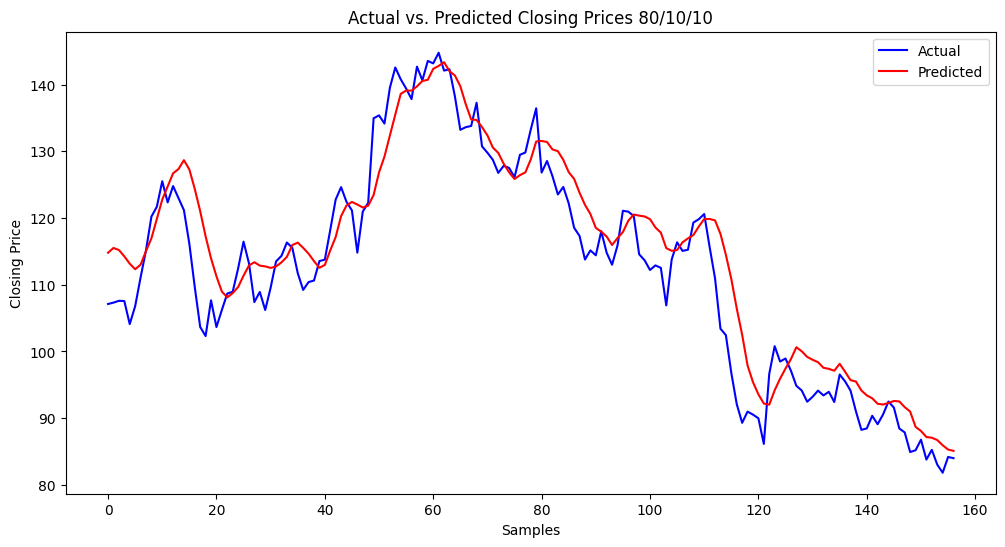

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for AMZN
df = yf.download('AMZN', start='2016-01-01', end='2023-01-01')

# Function for feature engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

# RSI computation function
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


# Apply feature engineering
df = feature_engineering(df)

# Select features and target
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]
X = df[feature_columns].values
y = df['Close'].values

# Use MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

In [ ]:
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 44s]
val_loss: 26900.158203125

Best val_loss So Far: 12.741066932678223
Total elapsed time: 00h 04m 32s
Best Hyperparameters:
Number of Layers: 3
units: 60
Dropout Rate: 0.3
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 252.3321 - mean_absolute_error: 11.5282 - mean_squared_error: 252.3321 - val_loss: 12.5633 - val_mean_absolute_error: 2.9696 - val_mean_squared_error: 12.5633
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 215.7872 - mean_absolute_error: 11.2177 - mean_squared_error: 215.7872 - val_loss: 85.3103 - val_mean_absolute_error: 8.6849 - val_mean_squared_error: 85.3103
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 211.5224 - mean_absolute_error: 10.8211 - mean_squared_error: 211.5224 - val_loss: 12.7702 - val_mean_absolute_error: 2.8836 - val_mean_squared_error: 12.7702
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 228.6910 - mean_absolute_error: 11.4168 - mean_squared_error: 228.6910 - val_loss: 18.0405 - val_mean_absolute_error: 3.5287 - val_mean_squared_error: 18.0405
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 239.5630 - mean_absolute_error: 11.4751 - mean_squared_error: 239.5630 - val_loss: 1

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 300.4264 - mean_absolute_error: 12.9172 - mean_squared_error: 300.4264 - val_loss: 64.7255 - val_mean_absolute_error: 7.0139 - val_mean_squared_error: 64.7255
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 359.6957 - mean_absolute_error: 14.0708 - mean_squared_error: 359.6957 - val_loss: 33.1601 - val_mean_absolute_error: 4.8691 - val_mean_squared_error: 33.1601
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 276.1204 - mean_absolute_error: 12.4206 - mean_squared_error: 276.1204 - val_loss: 31.9909 - val_mean_absolute_error: 4.2853 - val_mean_squared_error: 31.9909
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240.5018 - mean_absolute_error: 11.3207 - mean_squared_error: 240.5018 - val_loss: 29.1320 - val_mean_absolute_error: 4.3370 - val_mean_squared_error: 29.1320
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 244.1995 - mean_absolute_error: 11.6195 - mean_squared_error: 244.1995 - val_loss: 2

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 160.6269 - mean_absolute_error: 9.9348 - mean_squared_error: 160.6269 - val_loss: 14.3641 - val_mean_absolute_error: 2.9542 - val_mean_squared_error: 14.3641
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 168.9807 - mean_absolute_error: 9.6830 - mean_squared_error: 168.9807 - val_loss: 82.0735 - val_mean_absolute_error: 8.3563 - val_mean_squared_error: 82.0735
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 159.8357 - mean_absolute_error: 9.7782 - mean_squared_error: 159.8357 - val_loss: 250.8181 - val_mean_absolute_error: 15.4736 - val_mean_squared_error: 250.8181
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149.8227 - mean_absolute_error: 9.5788 - mean_squared_error: 149.8227 - val_loss: 22.1272 - val_mean_absolute_error: 3.7620 - val_mean_squared_error: 22.1272
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 146.9447 - mean_absolute_error: 9.2387 - mean_squared_error: 146.9447 - val_loss: 38.

In [ ]:
LSTM_3_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 60)               │          18,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 60)               │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60)                  │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,145 (895.10 KB)

 Trainable params: 76,381 (298.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 152,764 (596.74 KB)

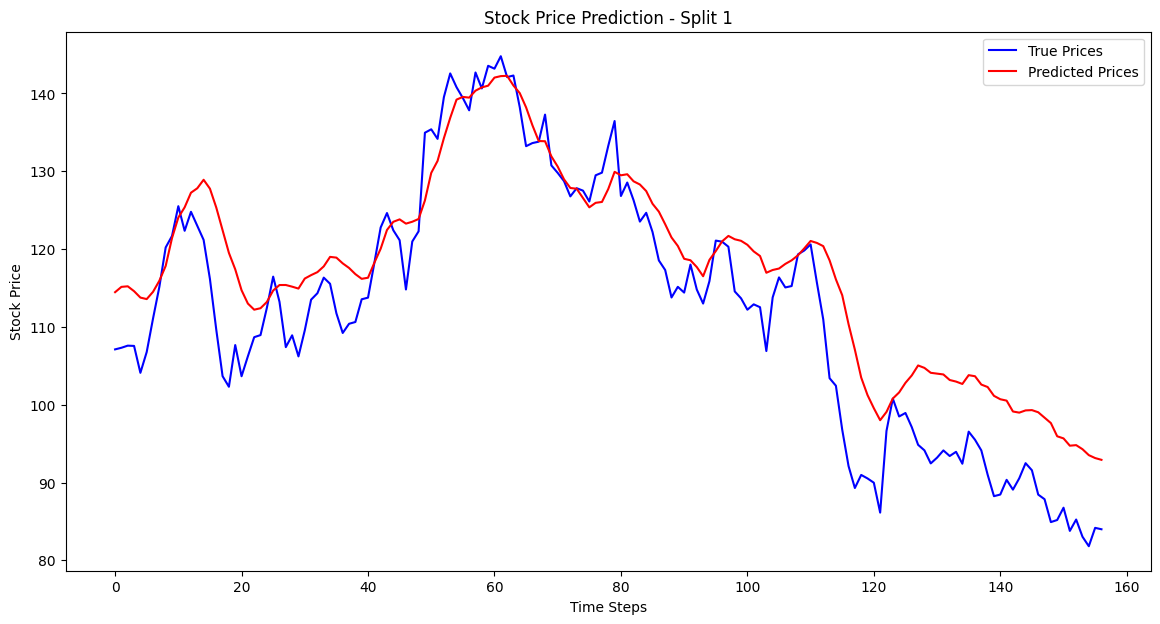

Split 1: MSE: 54.401526844717715, RMSE: 7.37573907108418, MAE: 5.889854771316431, R²: 0.796560612510467


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")